# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [17]:
# Initial imports
import os
import pandas as pd
import discord
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Keilan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("a8cbbf0ad7414948982b11efa141b7fe")

In [19]:
api_key='a8cbbf0ad7414948982b11efa141b7fe'

In [20]:
from newsapi import NewsApiClient

In [21]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [22]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything

In [24]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

9976

In [26]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

4819

In [27]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [28]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [29]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.007080,0.068500,0.066150,0.865300
std,0.382331,0.064372,0.057928,0.092949
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.039000,0.827000
50%,0.012800,0.064000,0.063000,0.888000
75%,0.350450,0.092250,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [30]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.010760,0.05290,0.047500,0.899700
std,0.433743,0.07589,0.044936,0.063144
min,-0.690800,0.00000,0.000000,0.731000
25%,-0.284450,0.00000,0.000000,0.858750
50%,-0.189700,0.00000,0.059000,0.923000
75%,0.303775,0.07650,0.069000,0.937000
max,0.865500,0.26900,0.178000,1.000000


In [54]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

In [56]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly higher than the mean positive score of Bitcoin of {btc_positive_mean} ")

A: Ethereum has the highest Mean Positive score of 0.053 which is slightly higher than the mean positive score of Bitcoin of 0.068 


In [57]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}. At the same time, Bitcoin has the highest Mean Compound score of {btc_compound_mean} ")


A: Ethereum has the highest Maximum Compound score of 0.866. At the same time, Bitcoin has the highest Mean Compound score of 0.007 


In [58]:
print(f"A: Ethereum has the highest Maximum Positive score of {eth_positive_max}.")


A: Ethereum has the highest Maximum Positive score of 0.269.


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [59]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [60]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [61]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [62]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['even', 'though', 'number', 'womenfocused', 'crypto', 'space', 'odeniran', 'say', 'woman', 'still', 'underrepresented', 'ive', 'space', 'im', 'black', 'person', 'woman', 'b'], ['bitcoin', 'mining', 'site', 'powered', 'otherwise', 'lost', 'gas', 'oil', 'well', 'near', 'linden', 'texas', 'april', 'th', 'photo', 'francois', 'picardafp', 'via', 'getty', 'images', 'corporate', 'climate', 'hype', 'fl'], ['warren', 'buffett', 'always', 'bitcoin', 'skeptic', 'billionaire', 'investor', 'harsh', 'word', 'yet', 'cryptocurrency', 'weekend', 'buffett', 'made', 'clear', 'opposition', 'crypt'], ['kid', 'remember', 'father', 'tried', 'use', 'broom', 'handle', 'last', 'ditch', 'effort', 'support', 'roof', 'wa', 'collapsing', 'weight', 'nearly', 'three', 'foot', 'snow', 'guess', 'well'], ['image', 'source', 'getty', 'imagesthe', 'value', 'bitcoin', 'continued', 'fall', 'weekend', 'dropped', 'according', 'coinbase', 'cryptocurrency', 'exchangethe', 'world', 'largest', 'cryp'], ['youve', 'ever', 'felt',

In [63]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [64]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['meta', 'revealed', 'nfts', 'work', 'instagram', 'usbased', 'test', 'show', 'youve', 'bought', 'created', 'free', 'connecting', 'instagram', 'account', 'compatible', 'digital', 'walle'], ['multibillion', 'dollar', 'cryptocurrency', 'company', 'apologised', 'user', 'sale', 'metaverse', 'land', 'sparked', 'frenzy', 'temporarily', 'brought', 'ethereum', 'cryptocurrencyyuga', 'labs', 'comp'], ['bored', 'ape', 'yacht', 'club', 'creator', 'yuga', 'labs', 'otherside', 'nft', 'collection', 'would', 'launch', 'april', 'wa', 'predicted', 'many', 'biggest', 'nft', 'launch', 'ever', 'otherside', 'upcoming', 'bore'], ['april', 'reuters', 'ether', 'promised', 'better', 'promised', 'go', 'next', 'level', 'edging', 'crypto', 'rival', 'even', 'outshining', 'godfather', 'bitcoin', 'clock', 'tickingthe'], ['ethereum', 'preparing', 'upgrade', 'thats', 'described', 'single', 'important', 'event', 'crypto', 'historythe', 'transition', 'would', 'overhaul', 'infrastructure', 'world', 'secondlargest', 'block

In [65]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, promised, better, prom..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [66]:
from collections import Counter
from nltk import ngrams

In [67]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
print(btc_flat_word_tokenized_list)

['even', 'though', 'number', 'womenfocused', 'crypto', 'space', 'odeniran', 'say', 'woman', 'still', 'underrepresented', 'ive', 'space', 'im', 'black', 'person', 'woman', 'b', 'bitcoin', 'mining', 'site', 'powered', 'otherwise', 'lost', 'gas', 'oil', 'well', 'near', 'linden', 'texas', 'april', 'th', 'photo', 'francois', 'picardafp', 'via', 'getty', 'images', 'corporate', 'climate', 'hype', 'fl', 'warren', 'buffett', 'always', 'bitcoin', 'skeptic', 'billionaire', 'investor', 'harsh', 'word', 'yet', 'cryptocurrency', 'weekend', 'buffett', 'made', 'clear', 'opposition', 'crypt', 'kid', 'remember', 'father', 'tried', 'use', 'broom', 'handle', 'last', 'ditch', 'effort', 'support', 'roof', 'wa', 'collapsing', 'weight', 'nearly', 'three', 'foot', 'snow', 'guess', 'well', 'image', 'source', 'getty', 'imagesthe', 'value', 'bitcoin', 'continued', 'fall', 'weekend', 'dropped', 'according', 'coinbase', 'cryptocurrency', 'exchangethe', 'world', 'largest', 'cryp', 'youve', 'ever', 'felt', 'like', 'i

In [69]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', 'fl'): 1, ('fl', 'warr

In [70]:
# Create a flat list of Ethereum tokenized words from a list of list
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['meta', 'revealed', 'nfts', 'work', 'instagram', 'usbased', 'test', 'show', 'youve', 'bought', 'created', 'free', 'connecting', 'instagram', 'account', 'compatible', 'digital', 'walle', 'multibillion', 'dollar', 'cryptocurrency', 'company', 'apologised', 'user', 'sale', 'metaverse', 'land', 'sparked', 'frenzy', 'temporarily', 'brought', 'ethereum', 'cryptocurrencyyuga', 'labs', 'comp', 'bored', 'ape', 'yacht', 'club', 'creator', 'yuga', 'labs', 'otherside', 'nft', 'collection', 'would', 'launch', 'april', 'wa', 'predicted', 'many', 'biggest', 'nft', 'launch', 'ever', 'otherside', 'upcoming', 'bore', 'april', 'reuters', 'ether', 'promised', 'better', 'promised', 'go', 'next', 'level', 'edging', 'crypto', 'rival', 'even', 'outshining', 'godfather', 'bitcoin', 'clock', 'tickingthe', 'ethereum', 'preparing', 'upgrade', 'thats', 'described', 'single', 'important', 'event', 'crypto', 'historythe', 'transition', 'would', 'overhaul', 'infrastructure', 'world', 'secondlargest', 'blockcha', 'do

In [71]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('meta', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'bored'): 1, ('bored', 'ape'): 1, ('ape', 'yacht'): 1, ('y

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [72]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [73]:
# Get the top 10 words for Bitcoin
word_counter(btc_flat_word_tokenized_list)

,word,count
0,bitcoin,12
1,cryptocurrency,11
2,world,6
3,reuters,5
4,investor,4
5,dropped,4
6,may,4
7,previous,4
8,closebitcoin,4
9,biggest,4


In [74]:
# Get the top 10 words for Ethereum
word_counter(eth_flat_word_tokenized_list)

,word,count
0,cryptocurrency,9
1,bitcoin,7
2,world,6
3,ethereum,5
4,biggest,5
5,reuters,5
6,last,5
7,may,5
8,nft,4
9,april,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [76]:
# Convert a list of tokens into a single string of tokens
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])
print(btc_big_string)

even though number womenfocused crypto space odeniran say woman still underrepresented ive space im black person woman b bitcoin mining site powered otherwise lost gas oil well near linden texas april th photo francois picardafp via getty images corporate climate hype fl warren buffett always bitcoin skeptic billionaire investor harsh word yet cryptocurrency weekend buffett made clear opposition crypt kid remember father tried use broom handle last ditch effort support roof wa collapsing weight nearly three foot snow guess well image source getty imagesthe value bitcoin continued fall weekend dropped according coinbase cryptocurrency exchangethe world largest cryp youve ever felt like introducing vegasstyle odds retirement plan youre finally lucklast fidelity investments would allow investor put part cryptocurrency mixer sometimes used help online criminal launder stolen money hiding true origin us treasury ready clamp hostile government btc fell lowest level since last july price drop

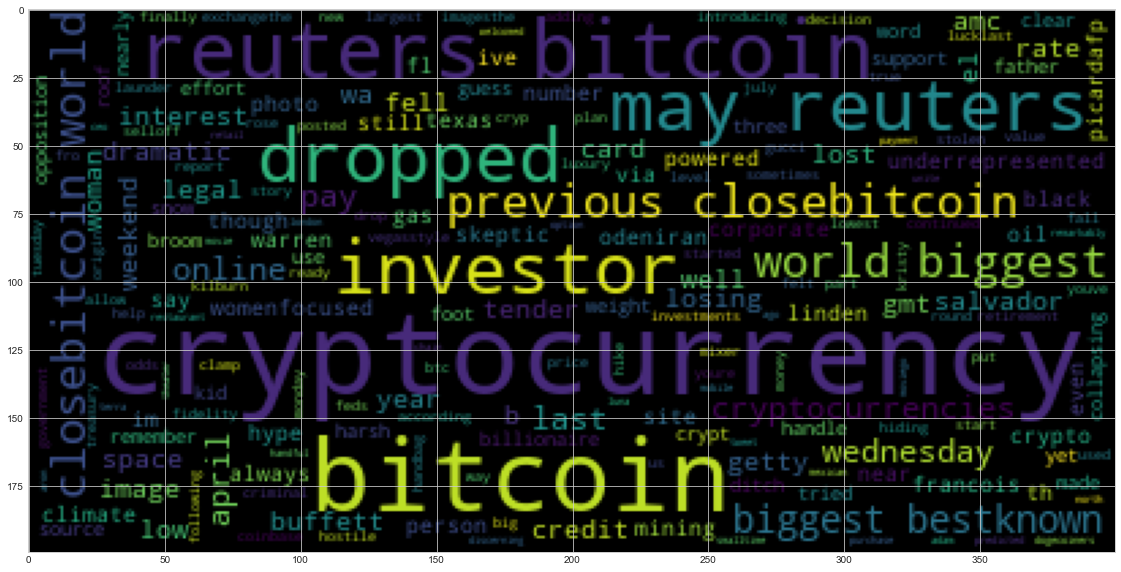

In [77]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [78]:
# Convert a list of tokens into a single string of tokens
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])
print(eth_big_string)

meta revealed nfts work instagram usbased test show youve bought created free connecting instagram account compatible digital walle multibillion dollar cryptocurrency company apologised user sale metaverse land sparked frenzy temporarily brought ethereum cryptocurrencyyuga labs comp bored ape yacht club creator yuga labs otherside nft collection would launch april wa predicted many biggest nft launch ever otherside upcoming bore april reuters ether promised better promised go next level edging crypto rival even outshining godfather bitcoin clock tickingthe ethereum preparing upgrade thats described single important event crypto historythe transition would overhaul infrastructure world secondlargest blockcha dogecoiners unite movie theater chain amc welcomed cryptocurrencies payment option online mobile purchase tweet april amc ceo adam aron moviego theres new metaverse project creator bored apes yacht club nfts last night held virtual land sale report bloomberg raising nearly third bil

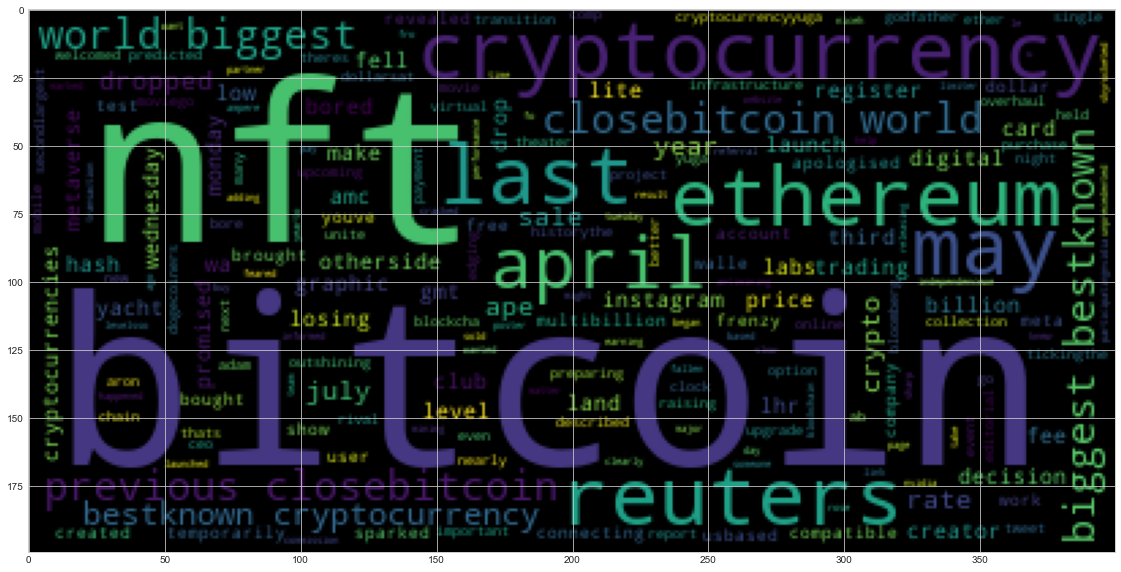

In [79]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [10]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [11]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together

# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images

 

 Of all the corporate climate hype fl… [+6544 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars] Image source, Getty Images
The value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Co

In [32]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)



In [33]:
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [35]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['Odeniran', 'Linden', 'Texas', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Getty Images\r\n', 'Fidelity Investments', 'the US Treasury', 'Fed', 'Bitcoin', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'AMC', 'AMC', 'Reuters', 'El Salvador', 'Touadera', 'the digital asset exchange', 'FTX', 'El Salvador']


---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together

# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.
Yuga Labs, the comp… [+3475 chars] When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars] April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock's ticking.
The No.2 … [+4092 chars] Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.
The transition would overhaul 

In [37]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [39]:

# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'Yacht Club', 'NFT', 'Reuters', 'AMC', 'AMC', 'Bloomberg', 'LHR', 'Ethereum', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'NFT', 'Ethereum', 'Nvidia', 'LHR', 'Fed', 'NFT', 'ApeCoin']


---